In [6]:
import pandas as pd
from sodapy import Socrata
import json
import requests as req
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import requests as req
import random 
#Connecting to API
length_data = 468,761
app_token = "X2gMakh5B2retT4oRxgQy2A9R"
#$$app_token=" + app_token
url = ("https://data.cityofnewyork.us/resource/7x9x-zpz6.json?$limit=4000&$offset=0")

results = req.get(url).json()

#put json data into dataframe
results_df = pd.DataFrame(data = results, columns = {"boro_nm", "rpt_dt", "ofns_desc","lat_long","law_cat_cd","prem_typ_desc"})

#rename columns
cleaned_df = results_df.rename(columns = {"boro_nm":"Borough", "rpt_dt": "Report Date", "ofns_desc": "Offense Decription", "lat_long":"Location", 
                                          "law_cat_cd":"Degree Of Crime", "prem_typ_desc":"Location Type"})

cleaned_df.head()


,Borough,Report Date,Degree Of Crime,Offense Decription,Location,Location Type
0,BROOKLYN,2017-01-27T00:00:00.000,MISDEMEANOR,SEX CRIMES,NaN,STREET
1,BRONX,2017-03-20T00:00:00.000,FELONY,SEX CRIMES,NaN,RESIDENCE - APT. HOUSE
2,BROOKLYN,2017-03-22T00:00:00.000,FELONY,RAPE,NaN,RESIDENCE - APT. HOUSE
3,MANHATTAN,2017-01-05T00:00:00.000,MISDEMEANOR,SEX CRIMES,NaN,TRANSIT - NYC SUBWAY
4,QUEENS,2017-03-22T00:00:00.000,MISDEMEANOR,SEX CRIMES,NaN,STREET


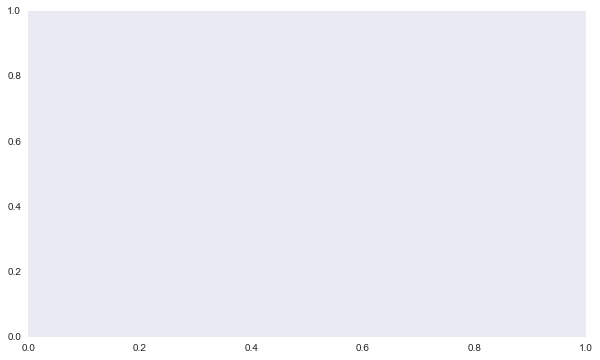

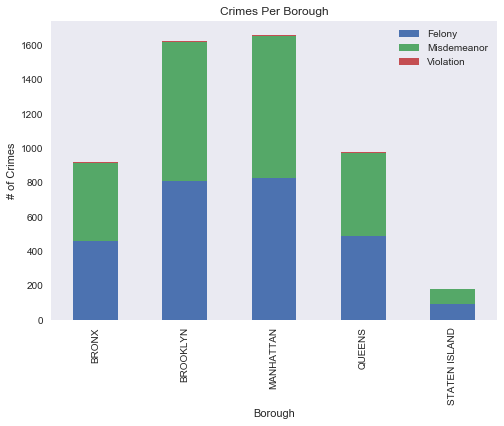

In [7]:
#MISDEMEANOR
mis_filter = cleaned_df['Degree Of Crime']=='MISDEMEANOR'
mis_final = cleaned_df[mis_filter]
borough_1_df = mis_final['Borough'].value_counts()

#FELONY
fel_filter = cleaned_df['Degree Of Crime']=='FELONY'
fel_final = cleaned_df[mis_filter]
borough_2_df = fel_final['Borough'].value_counts()

#VIOLATION
vio_filter = cleaned_df['Degree Of Crime']=='VIOLATION'
vio_final = cleaned_df[vio_filter]
borough_3_df = vio_final['Borough'].value_counts()



combined_all_df = pd.DataFrame({"Misdemeanor":borough_1_df, "Felony":borough_2_df, "Violation":borough_3_df}) 

combined_all_df
    



#plot 

combined_all_df.plot(kind='bar', stacked=True)
plt.title("Crimes Per Borough")
plt.xlabel("Borough")
plt.ylabel("# of Crimes")
plt.show()

In [16]:
#Read CSVs and Combine to One Dataframe
file_one = "rollingsales_bronx.csv"
file_two = "rollingsales_brooklyn.csv"
file_three = "rollingsales_manhattan.csv"
file_four = "rollingsales_queens.csv"
file_five = "rollingsales_statenisland.csv"

bronx_pd = pd.read_csv(file_one)
brooklyn_pd = pd.read_csv(file_two)
manhattan_pd = pd.read_csv(file_three)
queens_pd = pd.read_csv(file_four)
staten_island_pd = pd.read_csv(file_five)
sales_df = pd.concat([manhattan_pd, bronx_pd, brooklyn_pd, queens_pd, staten_island_pd])

#Clean missing rows, change Borough numbers to names and sort out residential buildings
sales_df['BOROUGH'] = sales_df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3:'Brooklyn', 4:'Queens', 5:'Staten Island'})
sales_df['BUILDING CLASS'], sales_df['CATEGORY'] = sales_df['BUILDING CLASS CATEGORY'].str.split(' ', 1).str
del (sales_df['BUILDING CLASS CATEGORY'], sales_df['BLOCK'], sales_df['LOT'],  sales_df['EASE-MENT'],  sales_df['TAX CLASS AT PRESENT'],
     sales_df['TAX CLASS AT TIME OF SALE'])
sales_df = sales_df.replace('-', np.nan).dropna(thresh=7)
sales_df = sales_df[~sales_df['BUILDING CLASS'].isin(['11A'])]
sales_df[['BUILDING CLASS']] = sales_df[['BUILDING CLASS']].apply(pd.to_numeric)
sales_df[' SALE PRICE '] = pd.to_numeric(sales_df[' SALE PRICE ']) 
#Use Loop to sort out residential buildings

# Create a list to store the data
sale_type = []

# For each row in the column,
for row in sales_df['BUILDING CLASS']:
    if row < 4 :
        sale_type.append('Residential Sale')
    elif row == 6:
        sale_type.append('Residential Sale')
    elif row == 9:
        sale_type.append('Residential Sale')
    elif row == 10:
        sale_type.append('Residential Sale')
    elif row == 12:
        sale_type.append('Residential Sale')
    elif row == 13:
        sale_type.append('Residential Sale')
    elif row == 15:
        sale_type.append('Residential Sale')
    elif row == 16:
        sale_type.append('Residential Sale')
    elif row == 17:
        sale_type.append('Residential Sale')
    else:
        # Append Other
        sale_type.append('Other')
        
# Create a column from the list
sales_df['sale_type'] = sale_type

sales_df = sales_df[~sales_df['sale_type'].isin(['Other'])]

#Create Price Bins and Dataframe for later
price_bins = [0, 250000, 500000, 750000, 1000000, 1500000, 2000000, 3000000, 4000000, 1000000000]

# Create the names for the bins
bin_names = ['$0-250K', '$250K-$500K', '$500K-$750K', '$750K-$1M', '$1M-$1.5M', '$1.5M-$2M',
              '$2M-$3M', '$3M-$4M', '4000000+']

sales_df["Price Category"] = pd.cut(sales_df[' SALE PRICE '], price_bins, labels=bin_names)


In [17]:
#Average Price Per Borough
sns.set_style("dark")

average_price = sales_df.groupby(["BOROUGH"])[" SALE PRICE "].mean()

avg_price_df = pd.DataFrame(average_price)
x = avg_price_df.index
y = average_price
plt.figure(figsize=(10,6))

plt.plot(x, y, color="#3182bd")
plt.title("Average Price Per Borough (2017)")

plt.grid(color="white") 
plt.savefig("avgprice.png")

plt.show()

ValueError: could not convert string to float: 'Staten Island'